**Introduction**

From Wikipedia

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:
Iris-setosa (n=50)
Iris-versicolor (n=50)
Iris-virginica (n=50)

The four features of the Iris dataset:
sepal length in cm
sepal width in cm
petal length in cm
petal width in cm

For this classification exercise on the Iris species data, 
* I first use some simple Python techniques to explore the data set. 
* Then I split half of the data into the training set to train the hypothesis model and half of them as validation set to check the test accuracy score 
* At last, we use the support vector machine to train the classification model.
* And we use GridSearchCV to tune the hyperparameters(C, gamma, kernel) in the SVC model to achieve 100% accuracy score.

One very import reminder is below. train_test_split shuffle the data before doing the split.  GridSearchCV does not shuffle the data before doing cross-validation. And our iris data is ordered by response variable Species ( 50 Iris-setosa, 50 Iris-virginica, and 50 Iris-virginica)  so we need to shuffle iris before using GridSearchCV.

In the future, I will also add the decision tree, bagging, Boosting and AdaBoost,  random forest classifier, logistic regression, K nearest neighbor classifier, naive Bayes to classify the model. 

|* If you think my kernel is helpful, please give me a voteup. This is very important for new people like me. Thank you in advance.
* If you have any question, please feel free to leave me a message, I will check every day. Thank you so much.

**Part I: Import library and load data**

In [48]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraires
import seaborn as sns
import matplotlib.pyplot as plt

# show plot in the notebook
%matplotlib inline

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

**Part II: Check the data information**

In [2]:
# first five observations
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Number of observations and missing values. 
# There are 150 observations and no nan value
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
# Check basic description for features
iris.drop(['Id','Species'], axis=1).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check the response variable frequency
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Part III: Explorary data analysis**

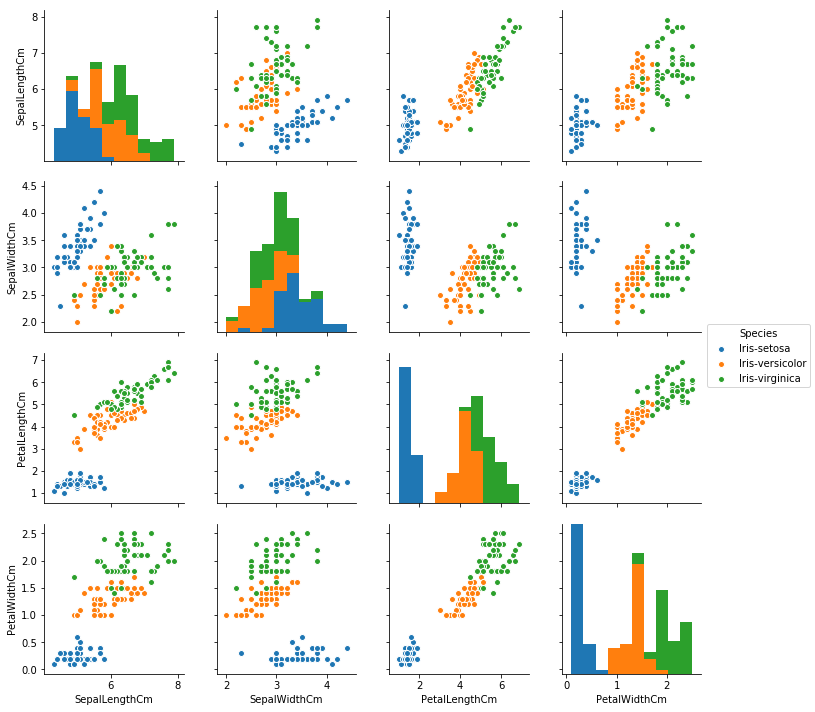

In [6]:
# Create a pairplot of the data set. Which flower species seems to be the most separable?
sns.pairplot(iris.drop(['Id'], axis=1),hue='Species')
# Iris setosa seems most separable from the other two species

C:\Users\zhang\Anaconda3 new\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0,0.5,'Sepal Width Cm')

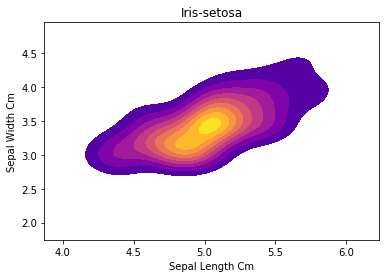

In [7]:
# Create a kde plot of sepal_length versus sepal width for setosa species of flower.
sub=iris[iris['Species']=='Iris-setosa']
sns.kdeplot(data=sub[['SepalLengthCm','SepalWidthCm']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')

C:\Users\zhang\Anaconda3 new\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Text(0,0.5,'Petal Width Cm')

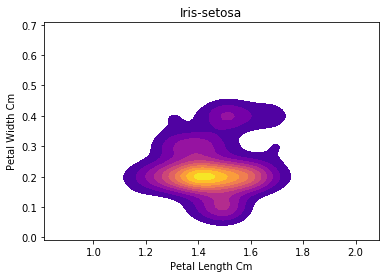

In [8]:
sns.kdeplot(data=sub[['PetalLengthCm','PetalWidthCm']],cmap="plasma", shade=True, shade_lowest=False)
plt.title('Iris-setosa')
plt.xlabel('Petal Length Cm')
plt.ylabel('Petal Width Cm')

Text(0.5,1,'Sepal Width versus Length for virginica species')

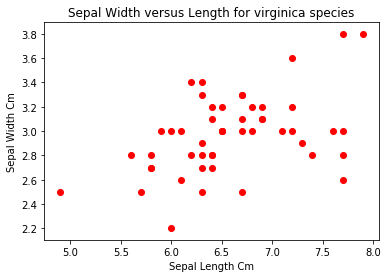

In [9]:
sub_virginica=iris[iris['Species']=='Iris-virginica']
# Create a scatter plot of the Sepal
plt.scatter(sub_virginica['SepalLengthCm'], sub_virginica['SepalWidthCm'], marker='o', color='r')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')
plt.title('Sepal Width versus Length for virginica species')

**Part 4: Train Test Split**

In [21]:
# Split data into a training set and a testing set.
# train_test_split shuffle the data before the split
from sklearn.model_selection import train_test_split
X=iris.drop(['Species', 'Id'], axis=1)
y=iris['Species']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.5, random_state=100)

**Part 5: Train a Model**

In [23]:
# Now its time to train a Support Vector Machine Classifier. 
# Call the SVC() model from sklearn and fit the model to the training data.
from sklearn.svm import SVC
model=SVC(C=1, kernel='rbf', tol=0.001)
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Part 6: Model Evaluation**

In [24]:
# Now get predictions from the model and create a confusion matrix and a classification report.
pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred))

[[28  0  0]
 [ 0 17  0]
 [ 0  4 26]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.81      1.00      0.89        17
 Iris-virginica       1.00      0.87      0.93        30

    avg / total       0.96      0.95      0.95        75



Accuracy score is:  0.9466666666666667


**Part 7: Gridsearch to tune hyperparameters**

In [51]:
iris.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


* 7.1 GridSearchCV does not shuffle the data before CV like train_test_split, we need to shuttle the Iris data by ourselves before using the GridSearchCV. Since in the original Iris data, data is sorted by species.

In [52]:
from sklearn.utils import shuffle
X=iris.drop(['Species', 'Id'], axis=1)
y=iris['Species']
print('Before shuffle: ',y[0:20])
X,y = shuffle(X,y, random_state=0)
print("After shuffle: ", y[0:20])

Before shuffle:  0     Iris-setosa
1     Iris-setosa
2     Iris-setosa
3     Iris-setosa
4     Iris-setosa
5     Iris-setosa
6     Iris-setosa
7     Iris-setosa
8     Iris-setosa
9     Iris-setosa
10    Iris-setosa
11    Iris-setosa
12    Iris-setosa
13    Iris-setosa
14    Iris-setosa
15    Iris-setosa
16    Iris-setosa
17    Iris-setosa
18    Iris-setosa
19    Iris-setosa
Name: Species, dtype: object
After shuffle:  114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
Name: Species, dtype: object


In [53]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',cv=3, verbose=1, refit=True )
grid.fit(X, y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

* The GridSearchCV exhaustive search over specified parameter values for an estimator in param_grid.
* CV=3 means we will use the three-fold cross-validation and check the performance of the mean accuracy score on the validation set
* scoring='accuracy' means we choose parameters with the best accuracy score, this is the default setting. We can also use scoring='precision', 'f1', 'recall'
* By using GridSearchCV to tune hyperparameters, we get 99.3% test accuracy score.

In [54]:
# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean cross-validated score of the best_estimator:  0.9933333333333333
The number of cross-validation splits (folds/iterations):  3


In [55]:
# Another optition is shuffle to use cv=KFold, we get 98% accuracy
from sklearn.model_selection import KFold
X=iris.drop(['Species', 'Id'], axis=1)
y=iris['Species']
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',
                  cv=KFold(n_splits=3, shuffle=True, random_state=0), verbose=1, refit=True )
grid.fit(X, y)

# The best hyperparameters chosen is
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Mean cross-validated score of the best_estimator:  0.98
The number of cross-validation splits (folds/iterations):  3


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.6s finished
